In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import optuna
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_csv('./data_test.csv')
x_test_1=data.drop(['Ea','Unnamed: 0'],axis=1)

In [3]:
data=pd.read_excel('./test.xlsx')
x_test_2=data.drop(['Ea'],axis=1)
x_test_2

,metal,Surface,rA,rB,pA,pB,Er
0,Pt,111,CH3CCH,*,CH3CCH*,NaN,-2.09
1,Os,111,CH3CCH,*,CH3CCH*,NaN,-2.50
2,Au,111,CH3CCH,*,CH3CCH*,NaN,0.01
3,Rh,111,CH3CCH,*,CH3CCH*,NaN,-2.17
4,Pd,111,CH3CCH,*,CH3CCH*,NaN,-1.41
...,...,...,...,...,...,...,...
78,Au,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.54
79,Ag,111,CH3CH2CH2*,*,CH3CH2CH*,H*,1.78
80,Ag,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.17
81,Co,111,CH3CH2CH2*,*,CH3CH2CH*,H*,0.13


In [4]:
x_test_1

,111,211,CH3CCH,CH3CCH*,CH3CCH2*,CH3CCH3*,CH3CH2C*,CH3CH2CH*,CH3CH2CH2*,CH3CH2CH3,...,CH3CHCH2*.1,CH3CHCH3,CH3CHCH3*.1,H*,X,r,E,M,rou,Er
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-2.58
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.30
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.73
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.30
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.562307,-0.304848,-1.078164,-0.714507,-0.693144,-2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,0.20
79,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,0.14
80,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,1.85
81,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,1.78


In [5]:
data=pd.read_csv('./try.csv')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1318)
feature=train_data.drop(['Ea','Unnamed: 0'],axis=1)
label=train_data['Ea']
x_test=test_data.drop(['Ea','Unnamed: 0'],axis=1)
y_test=test_data['Ea']

In [6]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [7]:
def optuna_objective(trial):
    gamma=trial.suggest_float('gamma',0.001,0.9)
    epsilon=trial.suggest_float('espilon',0.001,1)
    reg=SVR(gamma=gamma,epsilon=epsilon)
    loss=cross_val_score(reg,feature,label,cv=kfold,error_score='raise')
    return pow(abs(loss.mean()),0.5)

In [8]:
def optimizer_optuna(n_trials):
    algo=optuna.samplers.TPESampler(n_startup_trials=10,n_ei_candidates=24)
    study=optuna.create_study(sampler=algo,direction="maximize")
    study.optimize(optuna_objective,n_trials=n_trials,show_progress_bar=True)
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [9]:
optimizer_optuna(300)

[I 2023-05-04 10:34:46,901] A new study created in memory with name: no-name-34108b86-4870-4fd6-a330-72ff9154cfa3
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2023-05-04 10:34:46,963] Trial 0 finished with value: 0.04912633090328338 and parameters: {'gamma': 0.05975067165040224, 'espilon': 0.6856442778588726}. Best is trial 0 with value: 0.04912633090328338.
[I 2023-05-04 10:34:47,011] Trial 1 finished with value: 0.7978412707042615 and parameters: {'gamma': 0.27011734982464225, 'espilon': 0.05904542433648578}. Best is trial 1 with value: 0.7978412707042615.
[I 2023-05-04 10:34:47,053] Trial 2 finished with value: 0.26564599712509596 and parameters: {'gamma': 0.6095469905816485, 'espilon': 0.9636545805682402}. Best is trial 1 with value: 0.7978412707042615.
[I 2023-05-04 10:34:47,094] Trial 3 finished with value: 0.26564599712509596 and parameters: {'gamma': 0.7844043388956837, 'espilon': 0.9290093576396925}. Best is trial 1 with value: 0.7978412707042615.
[I 2023-05-04 10:34:47,138] Trial 4 finished with value: 0.705086487757671 and parameters: {'gamma': 0.2552577980383764, 'espilon': 0.28003841569092}. Best is trial 1 with value: 0.7978

({'gamma': 0.10238997044444198, 'espilon': 0.04607494148001754},
 [0.8196728137078257])

In [21]:
model = SVR(gamma=0.10238997044444198,epsilon= 0.04607494148001754).fit(X=feature , y=label)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.9037440373825177
MAE: 0.07764730489239957
测试集得分为： 0.7279376713033037 0.14836719786642114


In [47]:
import catboost as cb
model = cb.CatBoostRegressor(iterations=3000,max_depth=7,l2_leaf_reg=2.67289,silent=True,random_state=1314,learning_rate=0.09).fit(X=feature , y=label)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.989899028710045
MAE: 0.004952422243455189
测试集得分为： 0.8132550844609662 0.10908366943348959


In [48]:
# 预测1
Y1=model.predict(test_data.drop(['Ea','Unnamed: 0'],axis=1))
Y2=test_data['Ea']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)
# 预测2
Y_1=model.predict(feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

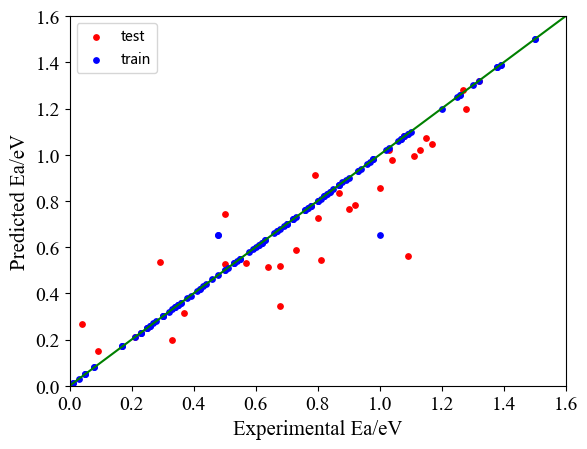

In [49]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,1.6))
plt.xlabel('Experimental Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,1.6))
plt.ylabel('Predicted Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,1.6],[0,1.6],color='g')
# plt.text(40,92,'Ridge',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()

In [14]:
model.feature_importances_

array([2.92810746e-01, 4.66379826e-01, 0.00000000e+00, 1.23770837e-02,
       8.27306542e-01, 7.55114166e-02, 1.00463701e+00, 1.27333114e+00,
       1.25050416e+00, 0.00000000e+00, 2.36350301e-01, 9.37705379e-02,
       4.90065996e-01, 0.00000000e+00, 1.36909042e-01, 3.95628119e-01,
       2.66938810e+00, 6.03309161e-01, 4.65730053e-01, 4.25422203e-01,
       7.28671101e-01, 8.53732561e-01, 3.44453447e-01, 0.00000000e+00,
       5.54817879e-01, 3.74405016e-01, 1.06416748e+00, 3.63050760e-01,
       1.12922554e-01, 0.00000000e+00, 9.16018497e+00, 5.15988063e+00,
       1.36418822e+01, 9.37410644e+00, 4.78870454e+00, 4.27595890e+01])

In [15]:
def plot_feature_importances(feature_importances,title,feature_names):
#     将重要性值标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
#     将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
#     让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0])+0.5
    
    plt.figure(figsize=(40,10))
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show() 

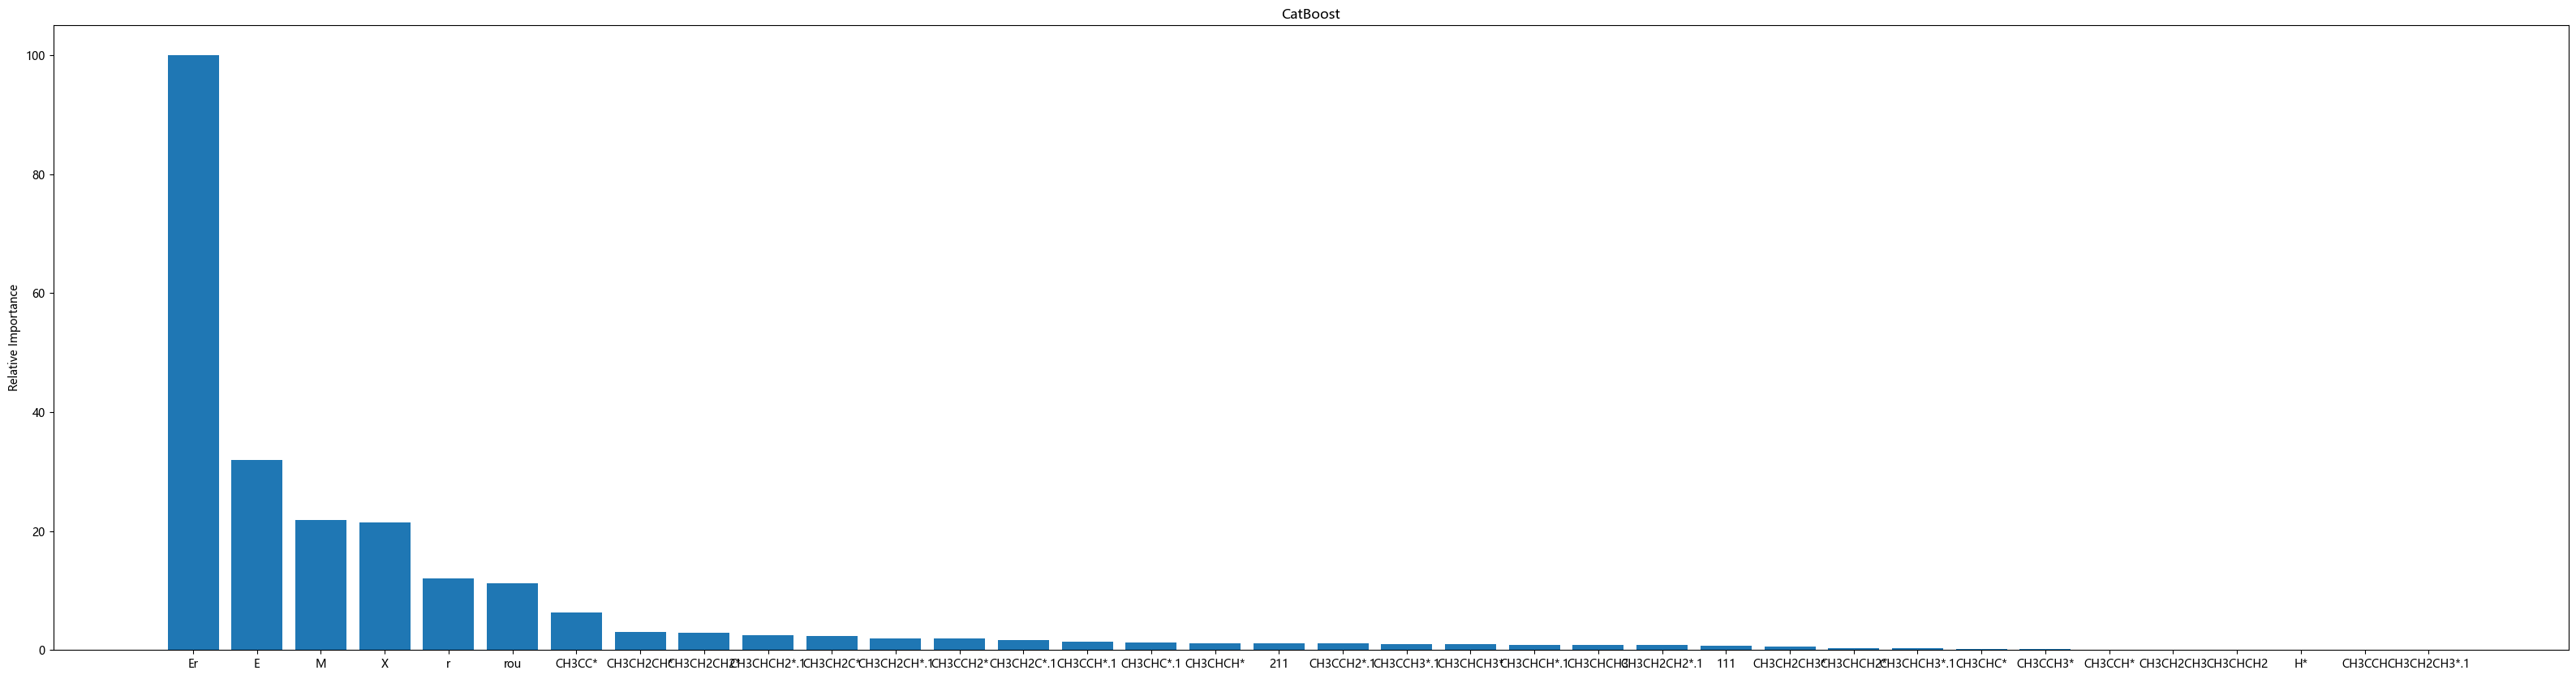

In [16]:
plot_feature_importances(model.feature_importances_,'CatBoost',feature.columns) 

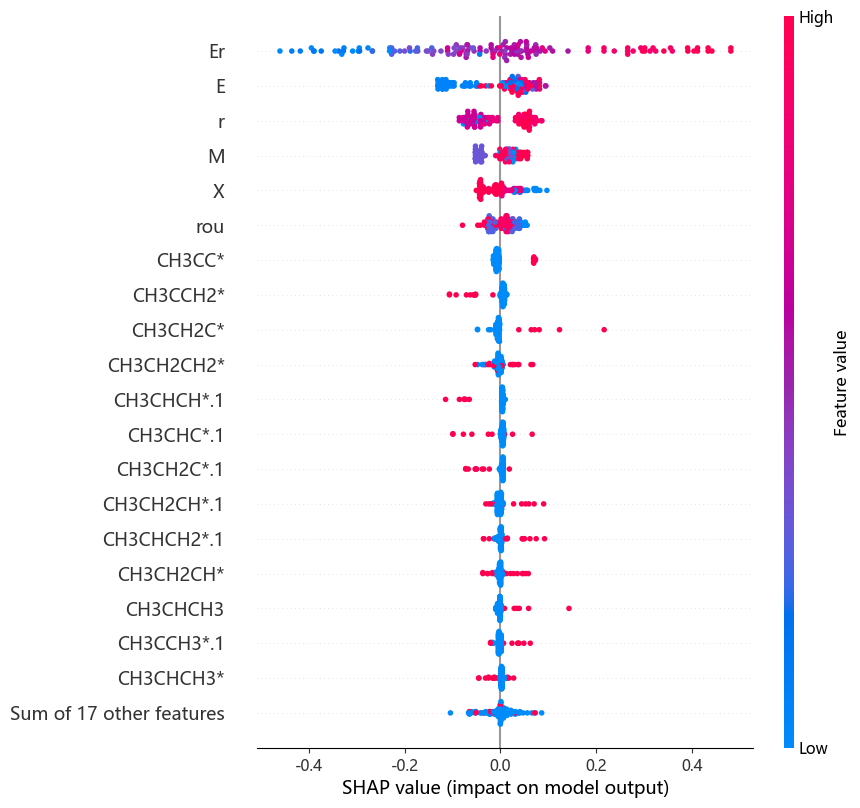

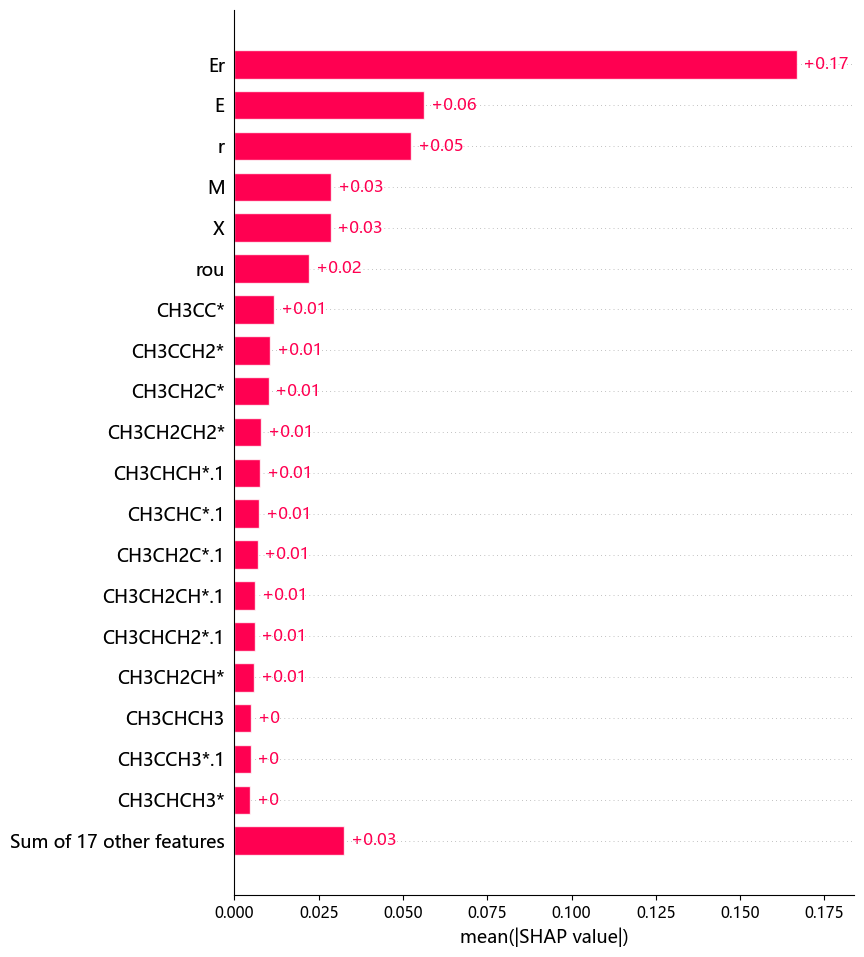

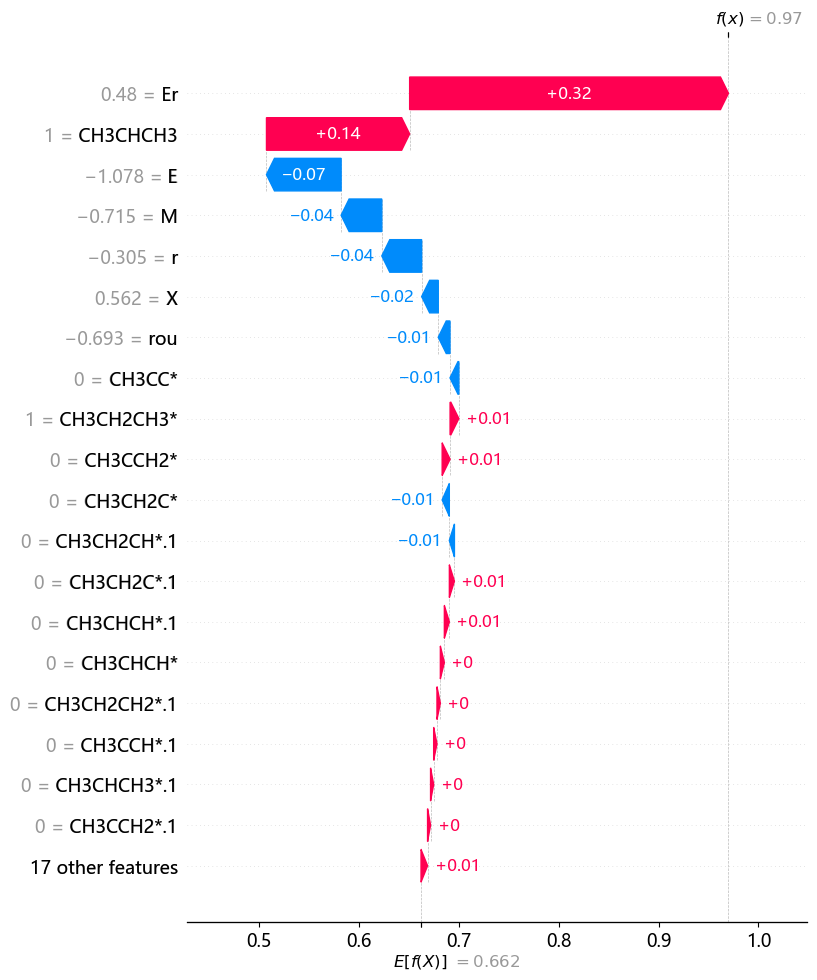

In [17]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feature)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
shap.plots.waterfall(shap_values[5], max_display=20)

In [18]:
pre_1=model.predict(x_test_1)
pre_1

array([0.34351243, 0.49350299, 0.42726879, 0.56580878, 0.16415921,
       0.30276938, 0.24444535, 0.32187469, 0.48966791, 0.51714529,
       0.63688366, 0.56861828, 0.27951142, 0.87053351, 0.35980321,
       0.55572892, 0.42911588, 1.25541556, 0.69692436, 0.70227048,
       0.22901199, 0.23253793, 0.27651996, 0.44986029, 0.335864  ,
       0.79747617, 0.48714343, 0.59120892, 0.15043284, 0.68831644,
       0.17578852, 0.38769201, 0.39074119, 0.83882821, 1.163496  ,
       0.50145293, 1.21694189, 1.20837359, 0.56691764, 0.35136107,
       0.62545972, 1.08241308, 0.84677299, 0.37185111, 0.7199792 ,
       0.62721552, 0.87308928, 0.791784  , 0.5333215 , 0.79411194,
       1.2068995 , 1.27358357, 0.49857267, 1.2010429 , 1.28364725,
       0.62546222, 1.17324121, 1.20516163, 1.29935297, 1.16293338,
       1.18678929, 1.16670796, 1.20456021, 1.19695463, 1.13381808,
       1.18898434, 0.73097776, 1.21149368, 1.28125472, 0.61913477,
       1.27686503, 1.22773719, 0.65695942, 1.16283302, 1.18924

In [19]:
y_test_1=pd.DataFrame(pre_1).round(5)
y_test_1.columns=(['Ea'])
fin=pd.concat([x_test_2,y_test_1],axis=1)
fin

,metal,Surface,rA,rB,pA,pB,Er,Ea
0,Pt,111,CH3CCH,*,CH3CCH*,NaN,-2.09,0.34351
1,Os,111,CH3CCH,*,CH3CCH*,NaN,-2.50,0.49350
2,Au,111,CH3CCH,*,CH3CCH*,NaN,0.01,0.42727
3,Rh,111,CH3CCH,*,CH3CCH*,NaN,-2.17,0.56581
4,Pd,111,CH3CCH,*,CH3CCH*,NaN,-1.41,0.16416
...,...,...,...,...,...,...,...,...
78,Au,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.54,1.00336
79,Ag,111,CH3CH2CH2*,*,CH3CH2CH*,H*,1.78,0.85268
80,Ag,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.17,1.23367
81,Co,111,CH3CH2CH2*,*,CH3CH2CH*,H*,0.13,1.19877


In [20]:
fin.to_csv('fin.csv')